# Lab 10

You will analyze the bacterial genome you assembled in the previous lab. You will summarizethe quality of your assembly using a few different statistics, identify the genome’s taxonomic origin, then obtain two genome annotations via different pipelines.

You are expected to keep a thorough record of everything you did in your notebook. Create afolder in your home directory for each lab, and keep all your files there. Try to create a directory hierarchy that makes sense, like the one we went over in Lab 1. Copy and paste any terminal commands you used into a Markdown section and explain what theinput was, what the tool did, and what the output was. Plot any results in-line and explain them.A PDF of your iPython notebook containing your analysis is due at 10pm on Wednesday of next week, spanning both this lab session and last week’s. 

[Assembly statistics](https://github.com/sanger-pathogens/assembly-stats)
 - https://en.wikipedia.org/wiki/N50,_L50,_and_related_statistics

rRNA Identification
 - https://en.wikipedia.org/wiki/16S_ribosomal_RNA
 - http://hmmer.org/
 - [Barrnap](https://github.com/tseemann/barrnap)
 - [SeqMatch](https://rdp.cme.msu.edu/seqmatch/seqmatch_intro.jsp)

[Bedtools](https://bedtools.readthedocs.io/en/latest/index.html)

Annotation services
 - https://narrative.kbase.us/#catalog/modules/ProkkaAnnotation
 - http://rast.nmpdr.org/

In [3]:
from Bio import SeqIO
import matplotlib.pyplot as plt

In [ ]:
!conda install -c bioconda assembly-stats
!conda install -c bioconda -c conda-forge barrnap
!conda install -c bioconda bedtools
!conda install -c bioconda assembly-stats
!conda install -c bioconda hmmer

## Generate assembly statistics

The genome assembled with the reduced set of reads may not be sufficient to receive a well annotated genome. A genome assembled with the full set of reads has been uploaded to bCourses. Download the compressed file which contains the contigs and scaffolds from bCourses.

Locate both assembled genomes. There should be a `contigs.fasta` and a `scaffolds.fasta` file in your SPAdes output directory as well. Contigs are contiguous sequences that could be assembled from your reads. Scaffolds are sets of contigs that have been stitched together in order, and are generally longer than contigs. Sometimes, the assembler can’t tell what sequence connects two contigs in a scaffold, and inserts N’s in the gap between them. Other times, the assembler has no additional information that could be used to determine the order and orientation of contigs in a scaffold. In this case, scaffolds == contigs.

Using the `assembly-stats` program, please calculate statistics on both your contigs and scaffolds files and the contigs and scaffolds files on bCourses. There will be 4 sets of statistics total. Report the total length of all contigs/scaffolds, the number of contigs/scaffolds, and the N50 for both assembled genomes in your iPython notebook.

In [3]:
!assembly-stats SPAdesoutput/contigs.fasta SPAdesoutput/scaffolds.fasta

stats for SPAdesoutput/contigs.fasta
sum = 5460976, n = 911, ave = 5994.49, largest = 73853
N50 = 17382, n = 92
N60 = 13875, n = 127
N70 = 11046, n = 171
N80 = 7865, n = 228
N90 = 4047, n = 323
N100 = 128, n = 911
N_count = 0
Gaps = 0
-------------------------------------------------------------------------------
stats for SPAdesoutput/scaffolds.fasta
sum = 5460996, n = 909, ave = 6007.70, largest = 73853
N50 = 17382, n = 92
N60 = 13875, n = 127
N70 = 11046, n = 171
N80 = 7865, n = 228
N90 = 4075, n = 323
N100 = 128, n = 909
N_count = 20
Gaps = 2


In [ ]:
!tar -xzvf contigs_and_scaffolds.tar.gz

In [4]:
!assembly-stats contigs.fasta scaffolds.fasta

stats for contigs.fasta
sum = 6676965, n = 170, ave = 39276.26, largest = 687575
N50 = 213896, n = 10
N60 = 201611, n = 13
N70 = 154231, n = 17
N80 = 124085, n = 22
N90 = 83516, n = 28
N100 = 128, n = 170
N_count = 0
Gaps = 0
-------------------------------------------------------------------------------
stats for scaffolds.fasta
sum = 6676985, n = 168, ave = 39743.96, largest = 687575
N50 = 213896, n = 10
N60 = 201611, n = 13
N70 = 154231, n = 17
N80 = 124085, n = 22
N90 = 92095, n = 28
N100 = 128, n = 168
N_count = 20
Gaps = 2


Questions:

**Why is N50 a useful statistic to calculate, and what does it indicate? Why not just list the mean or median contig length?**

> N50 is the length of the shortest contig, where combined with contigs of an equal or greater length, are 50% of the genome length. It is useful to calculate since it is a measure of quality/fragmentation. N50 is similar to a median in that it measures the half-mass point of the distribution, but whereas the mean/median only take into account individual measurements, N50 is much better at describing a distribution which can vary by several orders of magnitude by taking into account the total length and partial sums, which biases it towards higher statistics than a median.

**In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?**

> In our assembly, the scaffolds are approximately the same length as contigs, however you would normally expect them to be longer.

**What is the difference between the genomes assembled with the full set of reads and the down sampled set of reads?**

> While the sum and various N statistics are more or less the same order of magnitude, the max and average lengths were much higher the in the bCourses contigs.


The number of times a contig in your assembly was covered by the reads used to assemble it (the “coverage”) is listed at the end of the contig name in contigs.fasta. Extract the coverage from each FASTA header (using your preferred method) and plot a histogram of the coverage for all contigs for both assemblies.

In [12]:
next(SeqIO.parse("contigs.fasta", "fasta")).name

'NODE_1_length_687575_cov_8.340472'

170 14.3863769 1536.0


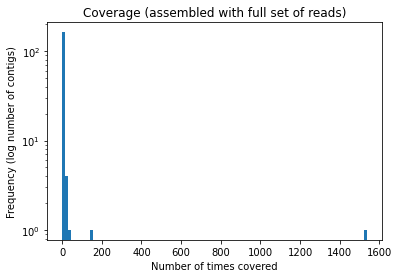

In [15]:
import numpy as np

coverage = []
for config in SeqIO.parse("contigs.fasta", "fasta"):
    coverage.append(float(config.name.rsplit('_', maxsplit=1)[1]))
print(len(coverage), np.mean(coverage), np.max(coverage))
    
plt.title("Coverage (assembled with full set of reads)")
plt.ylabel("Frequency (log number of contigs)")
plt.xlabel("Number of times covered")
plt.hist(coverage, bins=100, log=True)
plt.show()

911 0.860009048298573 117.0


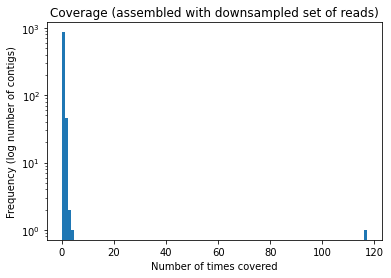

In [16]:
coverage = []
for config in SeqIO.parse("SPAdesoutput/contigs.fasta", "fasta"):
    coverage.append(float(config.name.rsplit('_', maxsplit=1)[1]))
print(len(coverage), np.mean(coverage), np.max(coverage))

plt.title("Coverage (assembled with downsampled set of reads)")
plt.ylabel("Frequency (log number of contigs)")
plt.xlabel("Number of times covered")
plt.hist(coverage, bins=100, log=True)
plt.show()

Questions:
**Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal?**

> The coverage is clearly not uniformly distributed or Gaussian due to its strong right skew, and due to the strong dropoff (and peaks). The coverage appears to follow a bimodal distribution, visible at a 100 or below vs above (however the max varies).

**What explains the presence of contigs with coverage an integer multiple of the mean coverage?**

> The mean of the coverage distribution is close to 14, though there are some contigs with coverages of 1536 and 150, which appear to be multiples of the average. This could be explained by the fact that the contigs that are covered more times by the reads from the sequencing have much smaller lengths.

**Is there a difference in the histograms between assemblies? If so, what is the difference?**

> While the shape is more or less the same, the actual number of contigs in the assembly I ran is much more than that in the full version! So, while they both share an outlier of length ~100, the full assembly resulted in an extreme outlier at around 1500.


## Identify the taxonfrom which your genome originated

We know that the genome originated from a taxonof bacteria. One component of bacterial ribosomes is the 16S ribosomal RNA subunit.This functional RNA is conserved throughout all bacteria, and is often used as a taxonomic marker gene.Much of the gene is highly conserved, as function ribosomes are required for protein synthesis, but some regions differ greater between bacterial taxa. These “hypervariable regions” can be used to determine the taxonfrom which a 16S rRNA gene originated.

Note from this point, you are focusing on your assembled genome. To identify your genome, you must 1) scan over the entire genome to locate copies of the 16S ribosomal RNA gene, 2) extract the 16S rRNA genes from your assembly, and 3) compare these genes to a database of known 16S rRNA genes.

First, run the barrnap program on your assembled contigs to locate rRNA genes.
``barrnap contigs.fasta > rrna.gff``
The first argument is the path to the assembled contigs. The greater-than symbol redirects the output to the General Feature Format (GFF) file rrna.gff. This program uses a Hidden Markov Model (HMM) that describes the structure of ribosomal RNAgenes to find their coordinates inside a genome. After this program completes, delete all lines within rrna.gff than those containing 16S_rRNA genes.

In [6]:
!barrnap contigs.fasta > rrna.gff

[barrnap] This is barrnap 0.9
[barrnap] Written by Torsten Seemann
[barrnap] Obtained from https://github.com/tseemann/barrnap
[barrnap] Detected operating system: linux
[barrnap] Adding /opt/conda/lib/barrnap/bin/../binaries/linux to end of PATH
[barrnap] Checking for dependencies:
[barrnap] Found nhmmer - /opt/conda/bin/nhmmer
[barrnap] Found bedtools - /opt/conda/bin/bedtools
[barrnap] Will use 1 threads
[barrnap] Setting evalue cutoff to 1e-06
[barrnap] Will tag genes < 0.8 of expected length.
[barrnap] Will reject genes < 0.25 of expected length.
[barrnap] Using database: /opt/conda/lib/barrnap/bin/../db/bac.hmm
[barrnap] Scanning contigs.fasta for bac rRNA genes... please wait
[barrnap] Command: nhmmer --cpu 1 -E 1e-06 --w_length 3878 -o /dev/null --tblout /dev/stdout '/opt/conda/lib/barrnap/bin/../db/bac.hmm' 'contigs.fasta'
[barrnap] Found: 16S_rRNA NODE_17_length_154231_cov_9.579771 L=1532/1585 124549..126080 + 16S ribosomal RNA
[barrnap] Found: 16S_rRNA NODE_1_length_687575_c

Next, use `bedtools getfasta` to extract nucleic acid sequences of the 16S rRNA genes from your assembly. You will need to specify the path to contigs.fasta with `-fi` and the path to the GFF file you obtained above, with `-bed`. The output will be in FASTA format. Redirect the output to anew fasta file with a name of you choosing.

In [8]:
!bedtools getfasta -fi contigs.fasta -bed 16S_rrna.gff > 16S_rrna.fasta

Finally, open your web browser and head over to **Ribosomal Database Project’s SeqMatch** tool. Copy and paste your 16S sequences one at a time into the window, or upload the resulting FASTA file from the previous step. This program will attempt to identify the 16S sequences as precisely as possible by comparing them to a database of high-quality, curated sequences, obtained from known bacteria.

You may not be able to obtain a “species”-level identification, but please write down your genus-level identification in your iPython notebook along with an explanation for how you came to this conclusion.

> As it turns out, all 6 of the 16S sequences have their highest matches in the genus Pseudomonas, which is definitive. The breakdown of the phylogeny is as follows:
>  - domain Bacteria  (6) 
>    - phylum Proteobacteria  (6) 
>      - class Gammaproteobacteria  (6) 
>        - order Pseudomonadales  (6) 
>          - family Pseudomonadaceae  (6) 
>            - genus Pseudomonas  (6) 


## Genome annotation

Knowledge of a genome’s taxonomic provenance can be used to infer quite a bit about its lifestyle. For example, if this genome belongs to the Mycoplasmagenus, we could take a guess that it lacks a cell wall and has a parasitic relationship to an animal host. Given that we know the sequence of the genome, however, we needn’t stop at an analysis based on taxonomic labels. We can look inside the genome and determine with high confidence whether it contains genes necessary to produce a cell wall, or virulence factors enabling the infection of an animal host. To do this, we need a program that can break the long genome sequence into genes, then identify their function by identifying orthologs with known function in other, more well-studied genomes. This is called genome annotation.

In this lab, you will upload the genome assembled with the full set of reads to two remote annotation services that will perform the annotation automatically: **RAST** and **KBase Prokka**
Annotation. There are many more annotation services, but for the sake of time, focus on only two. You must create an account to upload your genome to RAST and KBase.  This process may take some time.

## Research and write-up

Now that you have identified your genome and sent off your genome for annotation, take some time to research what is known about its genus and/or species. Search PubMed for recent publications and read through some abstracts. Once your RAST job has finished, you will be presented with a graphical interpretation of the pathways encoded by your genome, and information about its phylogenetic relatives.

Please summarize some of the information obtained in your annotation in a markdown section at the bottom of your notebook, placing it in the context of any papers you have found and read about related taxa. Use no more than 500 words and no more than two references. Include a word count at the top of the section. Try to make it exciting to both you and the reader. Focus on an interesting topic supported by evidence found during your analysis! Here are some ideas for topics, but feel free to choose your own:

1. What environment do relatives of your bacterium live in? Is there evidence of adaptation to this environment in the genome?

2. Based on its genome, is your bacterium auxotrophic for any amino acids? Are its closest relatives also auxotrophic for these?

3. Horizontal gene transfer is common among bacteria. Is there any evidence for HGT in your genome?

4. CRISPR-Cas9 is so hot right now. Does your genome have a CRISPR system? Can you determine where the spacer sequences originated from?

5. Does your genome encode any known bacteriocins, antibiotics, or toxins?

6. Make an argument for why or why not your bacterium would be considered a human pathogen, using the genome and your research as evidence.

7. Does your genome encode any known antibiotic resistance genes? Do you expect it to be susceptible to penicillin, tetracycline, or chloramphenicol?


The environment relatives of Pseudomonas generally inhabit soil, marshes, costal marine habitats, and also human and animal tissues. Pseudomonas can survive in a variety of ecological conditions, and thus have many phenotypes depending on its environmental condition.

These were metadata of both outputs on PROKKA and RAST on KBase. As you can see, they were not able to make a species match:

| Field | Value |
| - | - |
|Permanent Id|	77251/4/1|
|Full Type|	KBaseGenomes.Genome‑11.0|
|Saved by|	Alex Bondarenko (abondrn)|
|Taxonomy|	Unconfirmed Organism|
|Size|	6635920|
|Source|	PROKKA annotation pipeline|
|Name|	Unknown|
|GC content|	0.58799|
|Genetic code|	11|
|Number of Genome Level Warnings|	2|
|Number of Protein Encoding Genes|	6077|
|Assembly Object|	77251/2/1|
|Number contigs|	65|
|Domain|	Bacteria|
|Number of CDS|	6077|
|Genome Type|	draft isolate|
|MD5|	f71d54fad3aec00973b26a0c51bee0d0|

| Field | Value |
| - | - |
|Permanent Id|	77251/6/1|
|Full Type|	KBaseGenomes.Genome‑11.0|
|Saved by|	Alex Bondarenko (abondrn)|
|Taxonomy|	Unconfirmed Organism|
|Size|	6635920|
|Source|	KBase|
|Name|	Unknown species|
|GC content|	0.58799|
|Genetic code|	11|
|Number of Genome Level Warnings|	2|
|Source ID|	rast|
|Number of Protein Encoding Genes|	6300|
|Assembly Object|	77251/2/1|
|Number contigs|	65|
|Domain|	B|
|Number of CDS|	6300|
|Genome Type|	draft isolate|
|MD5|	f71d54fad3aec00973b26a0c51bee0d0|

When running RAST

 Cofactors, Vitamins, Prosthetic Groups, Pigments (354)
   Cell Wall and Capsule (230)
   Virulence, Disease and Defense (120)
   Potassium metabolism (30)
   Photosynthesis (0)
   Miscellaneous (72)
   Phages, Prophages, Transposable elements, Plasmids (8)
   Membrane Transport (258)
   Iron acquisition and metabolism (87)
   RNA Metabolism (213)
   Nucleosides and Nucleotides (133)
   Protein Metabolism (291)
   Cell Division and Cell Cycle (37)
   Motility and Chemotaxis (130)
   Regulation and Cell signaling (127)
   Secondary Metabolism (11)
   DNA Metabolism (127)
   Fatty Acids, Lipids, and Isoprenoids (212)
   Nitrogen Metabolism (109)
   Dormancy and Sporulation (4)
   Respiration (147)
   Stress Response (205)
   Metabolism of Aromatic Compounds (111)
   Amino Acids and Derivatives (723)
   Sulfur Metabolism (84)
   Phosphorus Metabolism (76)
   Carbohydrates (487)